In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r'C:\Users\hp\SpotifyDatasetVisualization\data\spotify-2023.csv', encoding='ISO-8859-1')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [11]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [12]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [13]:
df.dropna(subset=['in_shazam_charts', 'key'], inplace=True)

In [14]:
df.shape

(817, 24)

Histogram - Distribution of Track Energy Levels

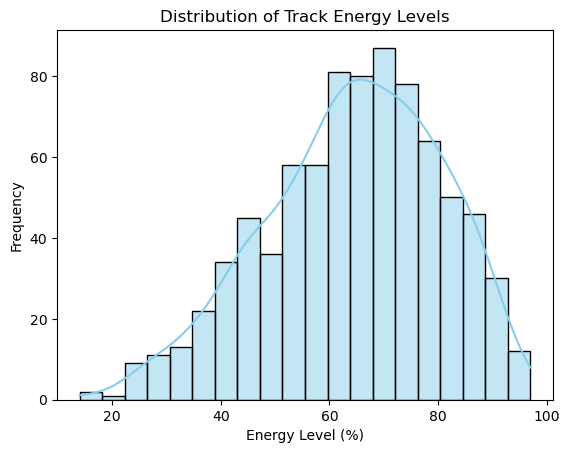

In [15]:
sns.histplot(df['energy_%'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Energy Levels')
plt.xlabel('Energy Level (%)')
plt.ylabel('Frequency')
plt.show()

Scatter Plot - Danceability vs Streams

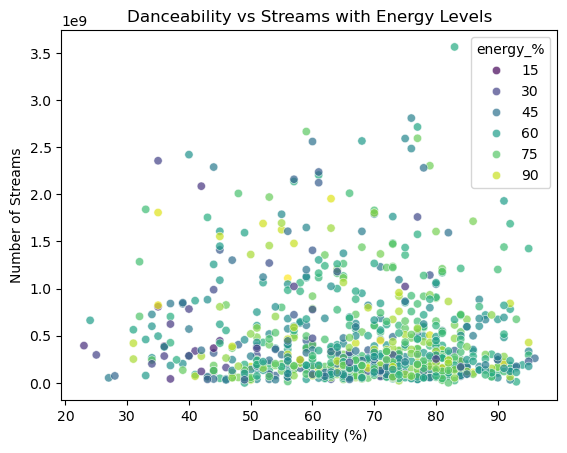

In [16]:
#Convert the streams column to numeric format
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

sns.scatterplot(data=df, x='danceability_%', y='streams', hue='energy_%', palette='viridis', alpha=0.7)

plt.title('Danceability vs Streams with Energy Levels')
plt.xlabel('Danceability (%)')
plt.ylabel('Number of Streams')
plt.show()

Box Plot - Energy Levels Across Musical Keys

C:\Users\hp\AppData\Local\Temp\ipykernel_13592\551388606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='key', y='energy_%', palette='Set2')


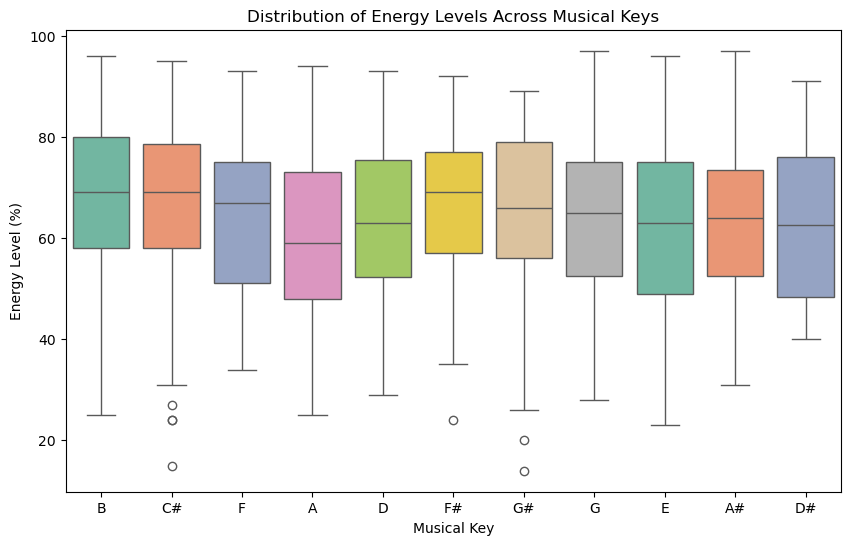

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='key', y='energy_%', palette='Set2')

plt.title('Distribution of Energy Levels Across Musical Keys')
plt.xlabel('Musical Key')
plt.ylabel('Energy Level (%)')
plt.show()

Violin Plot - Energy by Key

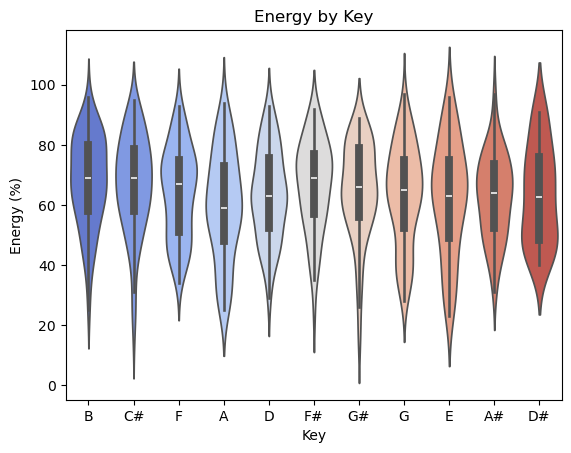

In [18]:
sns.violinplot(data=df, x='key', y='energy_%', palette='coolwarm', hue='key')

plt.title('Energy by Key')
plt.xlabel('Key')
plt.ylabel('Energy (%)')
plt.show()


Pair Plot - Valence, Acousticness, and Streams

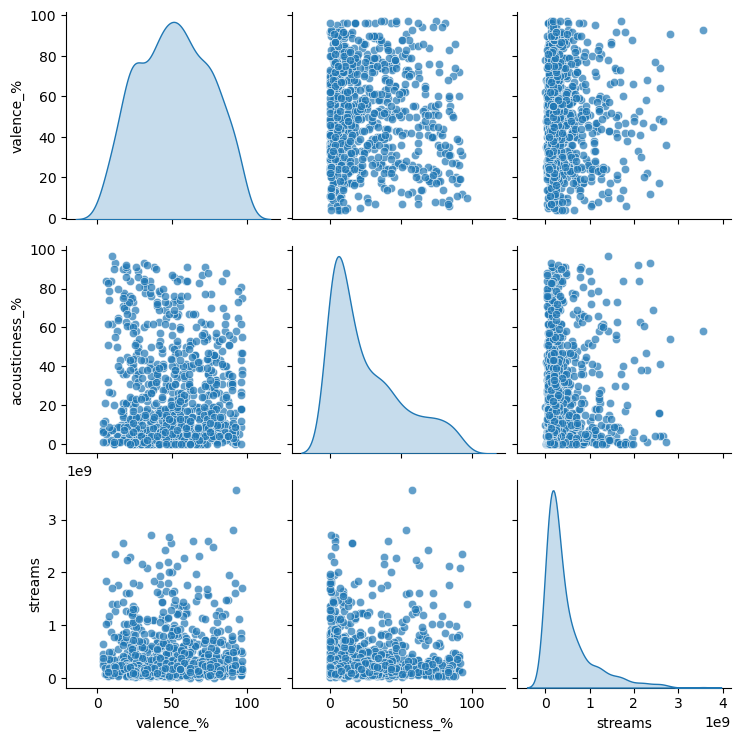

In [19]:
subset_data = df[['valence_%', 'acousticness_%', 'streams']]

sns.pairplot(subset_data, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

Count Plot - Number of Tracks Released per Year


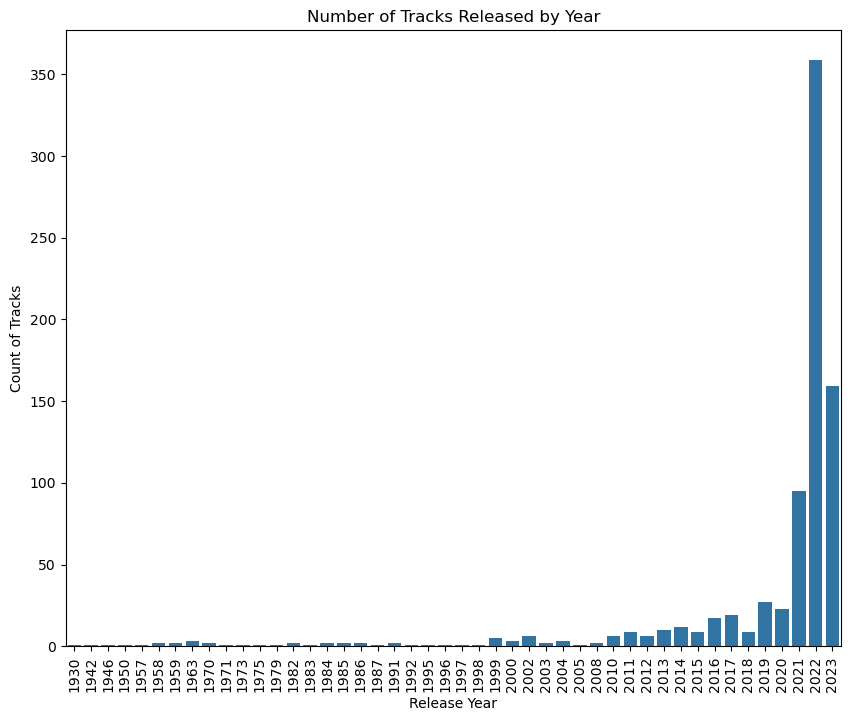

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='released_year')

plt.title('Number of Tracks Released by Year')
plt.xlabel('Release Year')
plt.xticks(rotation=90)
plt.ylabel('Count of Tracks')
plt.show()

Swarm Plot - Danceability Across Release Months

c:\Users\hp\Miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


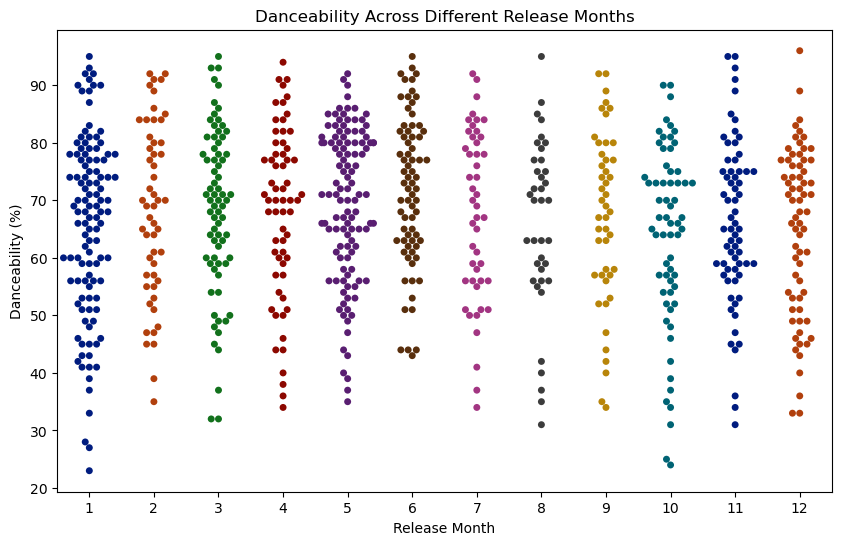

In [21]:
plt.figure(figsize=(10, 6))

sns.swarmplot(data=df, x='released_month', y='danceability_%', palette='dark', hue='released_month', legend=False)

plt.title('Danceability Across Different Release Months')
plt.xlabel('Release Month')
plt.ylabel('Danceability (%)')
plt.show()

Point Plot - Average Acousticness by Release Year

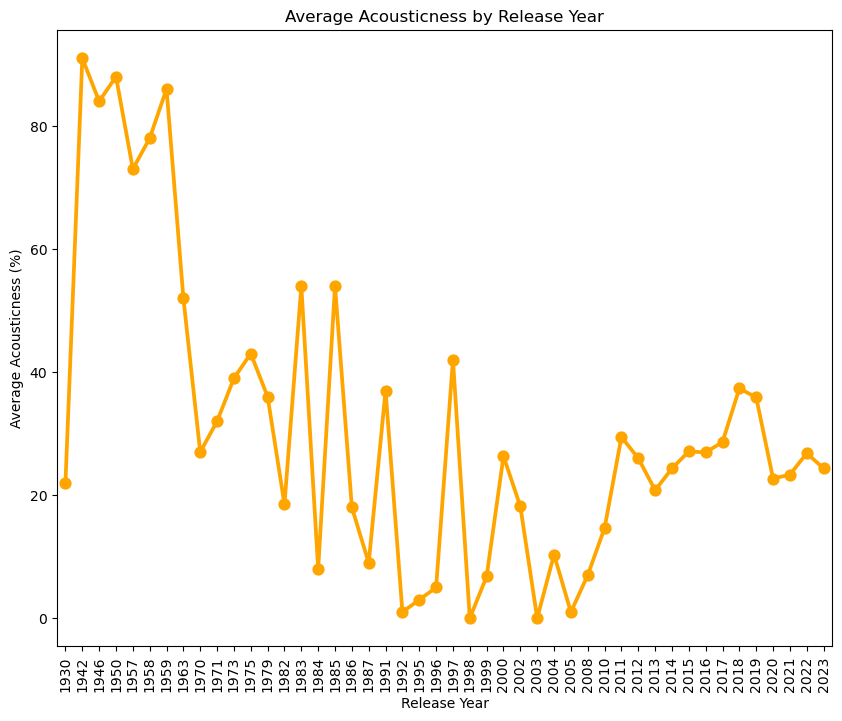

In [22]:
plt.figure(figsize=(10, 8))
avg_acousticness_per_year = df.groupby('released_year')['acousticness_%'].mean().reset_index()

sns.pointplot(data=avg_acousticness_per_year, x='released_year', y='acousticness_%', color='orange')

plt.title('Average Acousticness by Release Year')
plt.xlabel('Release Year')
plt.xticks(rotation=90)
plt.ylabel('Average Acousticness (%)')
plt.show()

Joint Plot - Valence vs Energy

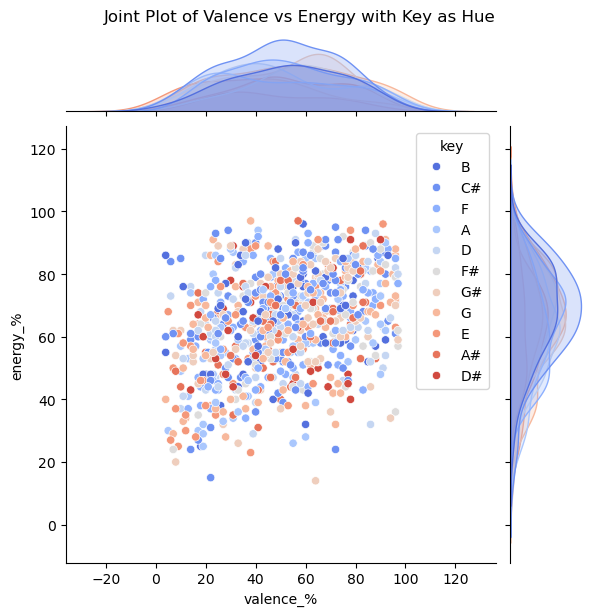

In [23]:
sns.jointplot(data=df, x='valence_%', y='energy_%', kind='scatter', hue='key', palette='coolwarm')

plt.suptitle('Joint Plot of Valence vs Energy with Key as Hue', y=1.02)
plt.show()

Strip Plot - Energy Distribution by Danceability Quartiles

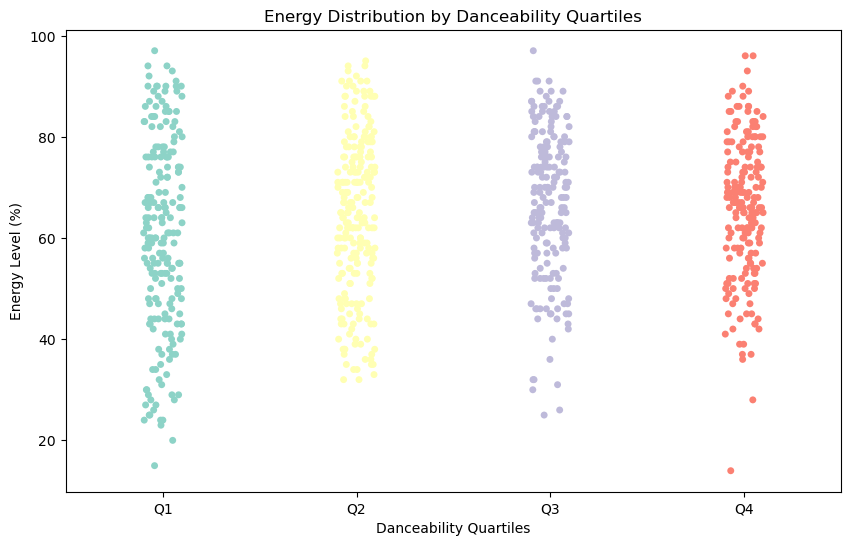

In [24]:
df['danceability_quartile'] = pd.qcut(df['danceability_%'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='danceability_quartile', y='energy_%', jitter=True, palette='Set3', hue='danceability_quartile', legend=False)

plt.title('Energy Distribution by Danceability Quartiles')
plt.xlabel('Danceability Quartiles')
plt.ylabel('Energy Level (%)')
plt.show()

Facet Grid - BPM Across Keys

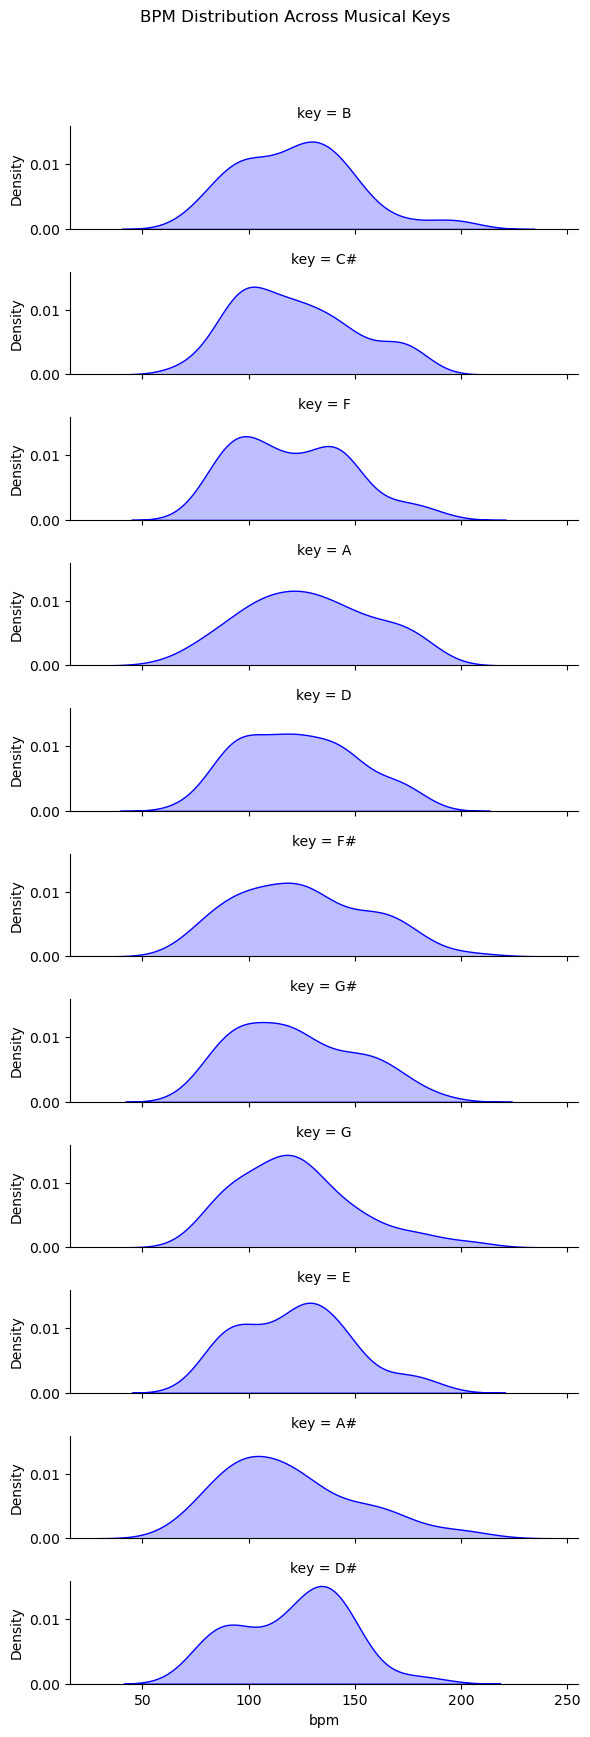

In [25]:
g = sns.FacetGrid(df, row="key", height=1.5, aspect=4)
g.map(sns.kdeplot, "bpm", fill=True, color="blue")

g.fig.suptitle('BPM Distribution Across Musical Keys', y=1.05)
plt.show()

Hexbin Plot - Streams vs Acousticness

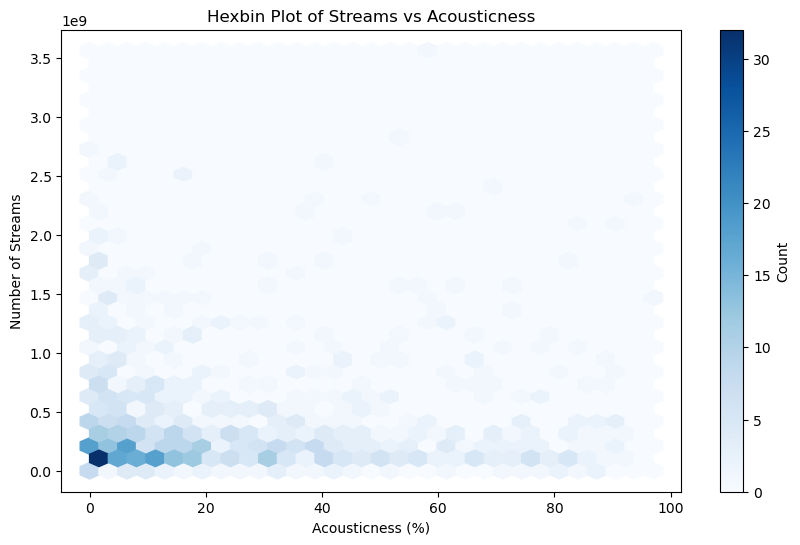

In [26]:
plt.figure(figsize=(10, 6))

plt.hexbin(df['acousticness_%'], df['streams'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')


plt.title('Hexbin Plot of Streams vs Acousticness')
plt.xlabel('Acousticness (%)')
plt.ylabel('Number of Streams')
plt.show()

Bar Plot - Tracks in Playlists by Year

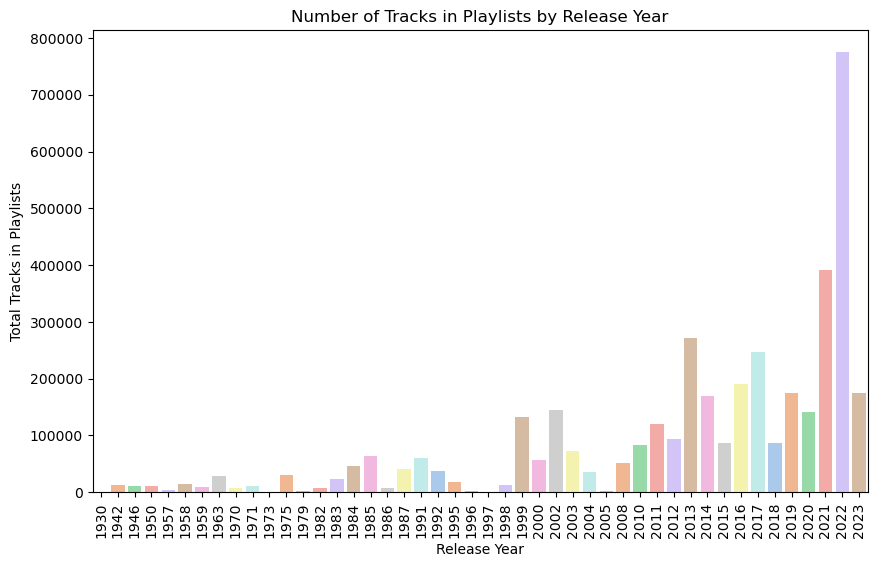

In [27]:
tracks_per_year = df.groupby(['released_year'])['in_spotify_playlists'].sum().reset_index()

#Bar plot visualizing number of tracks per year
plt.figure(figsize=(10, 6))
sns.barplot(data=tracks_per_year, x='released_year', y='in_spotify_playlists', palette='pastel',hue='released_year', legend=False)

plt.title('Number of Tracks in Playlists by Release Year')
plt.xlabel('Release Year')
plt.xticks(rotation=90)
plt.ylabel('Total Tracks in Playlists')
plt.show()

Line Plot - Danceability vs Energy

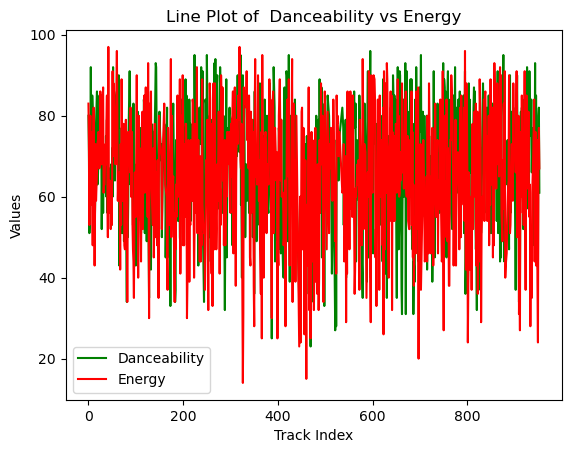

In [28]:
plt.plot(df.index, df['danceability_%'], label='Danceability', color='green')
plt.plot(df.index, df['energy_%'], label='Energy', color='red')

plt.title('Line Plot of  Danceability vs Energy')
plt.xlabel('Track Index')
plt.ylabel('Values')

plt.legend()
plt.show()

3D Scatter Plot - Danceability, Energy, and Streams

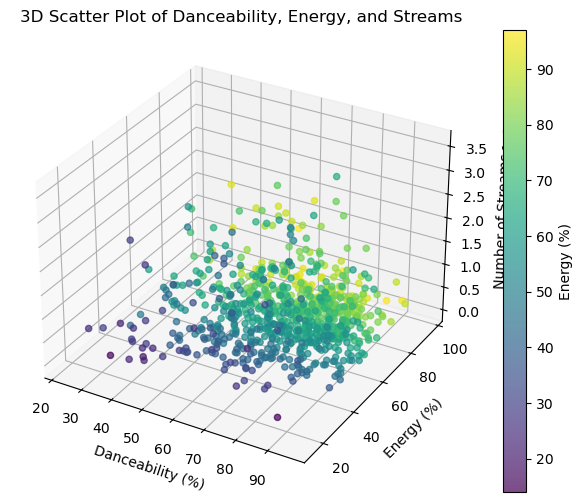

In [29]:
from mpl_toolkits.mplot3d import Axes3D

#3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['danceability_%']
y = df['energy_%']
z = df['streams']

#Scatter plot
scatter = ax.scatter(x, y, z, c=df['energy_%'], cmap='viridis', alpha=0.7)

ax.set_xlabel('Danceability (%)')
ax.set_ylabel('Energy (%)')
ax.set_zlabel('Number of Streams')
ax.set_title('3D Scatter Plot of Danceability, Energy, and Streams')

#Color bar for energy
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Energy (%)')

plt.show()